# Caso COVID-19 Fase 2
Julián Correa, Guillermo Cortés, Cristian Sarmiento

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Se importa la libreria procesada en la unidad anterior

In [2]:
df = pd.read_csv('archivo_procesado.csv')
df.head()

,Country/Region,date,value,new_cases,month_year
0,Afghanistan,2020-01-22,0,0.0,2020-01
1,Afghanistan,2020-01-23,0,0.0,2020-01
2,Afghanistan,2020-01-24,0,0.0,2020-01
3,Afghanistan,2020-01-25,0,0.0,2020-01
4,Afghanistan,2020-01-26,0,0.0,2020-01


Agrupamos y sumamos los casos para dejas los casos por meses

In [3]:
monthly_cases = df.groupby(['Country/Region', 'month_year'])['new_cases'].sum().reset_index()
monthly_cases

,Country/Region,month_year,new_cases
0,Afghanistan,2020-01,0.0
1,Afghanistan,2020-02,5.0
2,Afghanistan,2020-03,163.0
3,Afghanistan,2020-04,1661.0
4,Afghanistan,2020-05,13353.0
...,...,...,...
7834,Zimbabwe,2022-11,1271.0
7835,Zimbabwe,2022-12,817.0
7836,Zimbabwe,2023-01,1625.0
7837,Zimbabwe,2023-02,2315.0


Se obtienen los casos por pais

In [4]:
total_cases_per_country = df.groupby('Country/Region')['new_cases'].sum().reset_index()
total_cases_per_country

,Country/Region,new_cases
0,Afghanistan,209507.0
1,Albania,334457.0
2,Algeria,271496.0
3,Andorra,47890.0
4,Angola,105288.0
...,...,...
196,West Bank and Gaza,703228.0
197,Winter Olympics 2022,535.0
198,Yemen,11946.0
199,Zambia,343135.0


Se obtiene los tres paises con mas casos

In [5]:
top_countries = total_cases_per_country.nlargest(3, 'new_cases')['Country/Region']
top_countries

186        US
80      India
63     France
Name: Country/Region, dtype: object

Se filtran por esos tres paises

In [6]:
top_countries_data = monthly_cases[monthly_cases['Country/Region'].isin(top_countries)]
top_countries_data

,Country/Region,month_year,new_cases
2457,France,2020-01,5.0
2458,France,2020-02,95.0
2459,France,2020-03,52181.0
2460,France,2020-04,140309.0
2461,France,2020-05,22553.0
...,...,...,...
7288,US,2022-11,1321555.0
7289,US,2022-12,1952012.0
7290,US,2023-01,1597537.0
7291,US,2023-02,1080585.0


## Construir una gráfica que muestre la variación de contagios, mes a mes, de los tres países con más casos reportados.

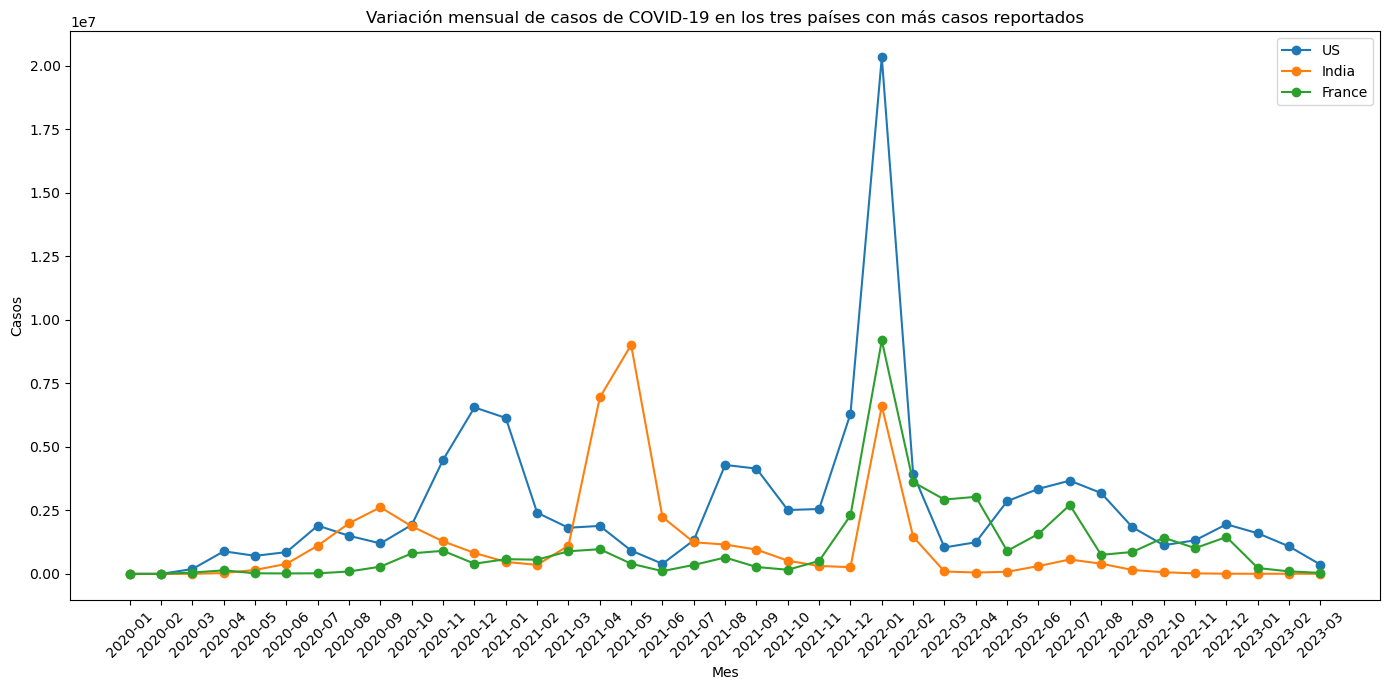

In [15]:
plt.figure(figsize=(14, 7))

for country in top_countries:
    country_data = top_countries_data[top_countries_data['Country/Region'] == country]
    plt.plot(country_data['month_year'].astype(str), country_data['new_cases'], marker='o', label=country)

plt.xlabel('Mes')
plt.ylabel('Casos')
plt.title('Variación mensual de casos de COVID-19 en los tres países con más casos reportados')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Construir una gráfica que muestre una comparación del total de contagios de cinco países.
Escogemos 5 paises de latinoamerica para el ejercicion **Colombia**, **Argentina**, **Peru**, **Chile** y **Ecuador**.

In [8]:
selected_countries = ['Colombia', 'Argentina', 'Peru', 'Chile', 'Ecuador']
selected_countries_data = monthly_cases[monthly_cases['Country/Region'].isin(selected_countries)]
total_cases_per_country = selected_countries_data.groupby('Country/Region')['new_cases'].sum().reset_index()
total_cases_per_country

,Country/Region,new_cases
0,Argentina,10044957.0
1,Chile,5192286.0
2,Colombia,6359093.0
3,Ecuador,1068594.0
4,Peru,4561117.0


Se contruye la gráfica

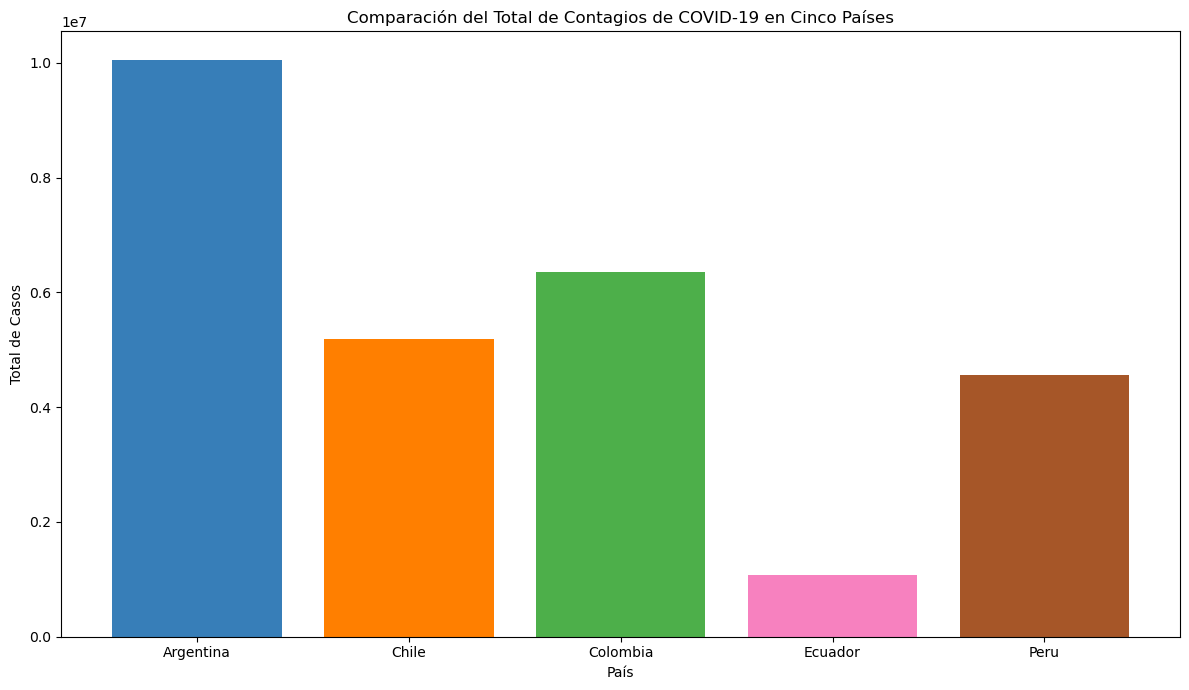

In [9]:
plt.figure(figsize=(12, 7))
colors = ['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628']
plt.bar(total_cases_per_country['Country/Region'], total_cases_per_country['new_cases'], color=colors)

plt.xlabel('País')
plt.ylabel('Total de Casos')
plt.title('Comparación del Total de Contagios de COVID-19 en Cinco Países')
plt.tight_layout()
plt.show()

Se construye una gráfica de los paises mes a mes con los valores acumulados 

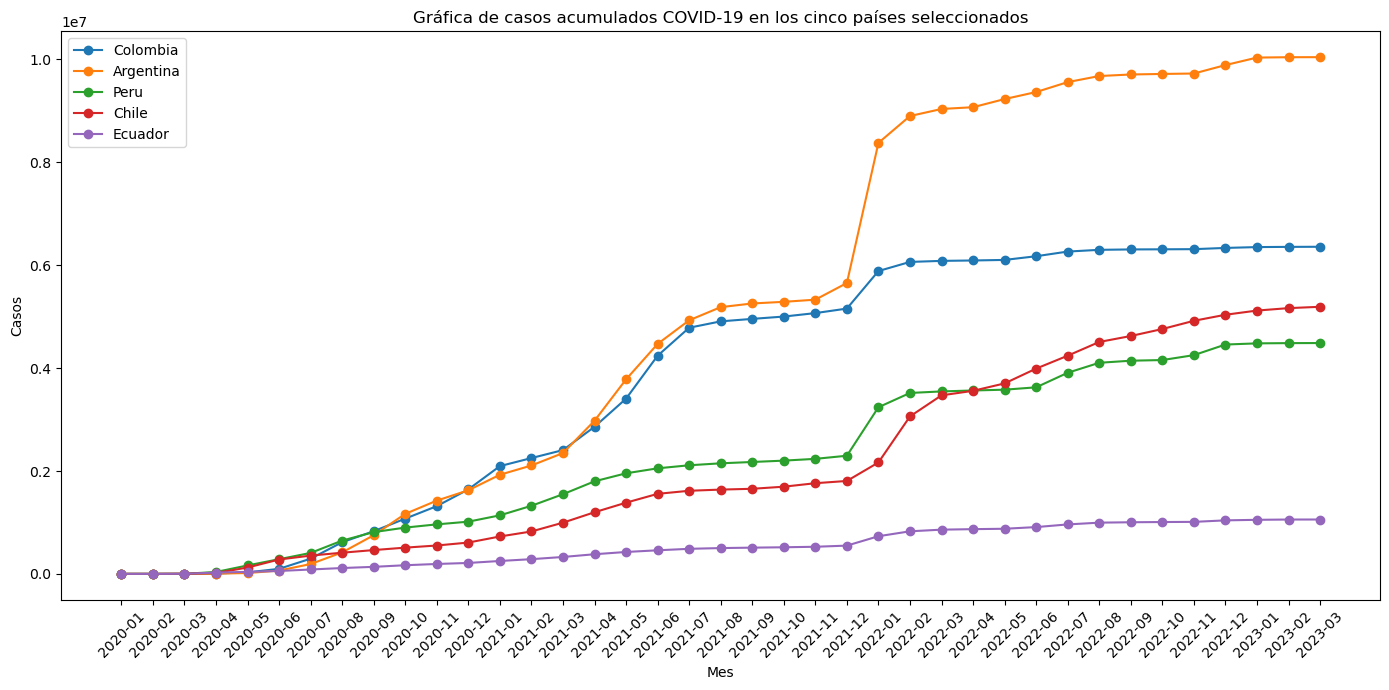

In [34]:
plt.figure(figsize=(14, 7))

df_grouped = df.groupby(['Country/Region', 'month_year']).agg({'value': 'last'}).reset_index()
for country in selected_countries:
    country_data = df_grouped[df_grouped['Country/Region'] == country]
    plt.plot(country_data['month_year'].astype(str), country_data['value'], marker='o', label=country)

plt.xlabel('Mes')
plt.ylabel('Casos')
plt.title('Gráfica de casos acumulados COVID-19 en los cinco países seleccionados')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Usando los países elegidos en el punto anterior, construir una gráfica que muestre el porcentaje de contagios de cada país con respecto al total de contagios en el mundo.

Calculamos el total de casos en el mundo

In [11]:
total_world_cases = df['new_cases'].sum()
total_world_cases

677421478.0

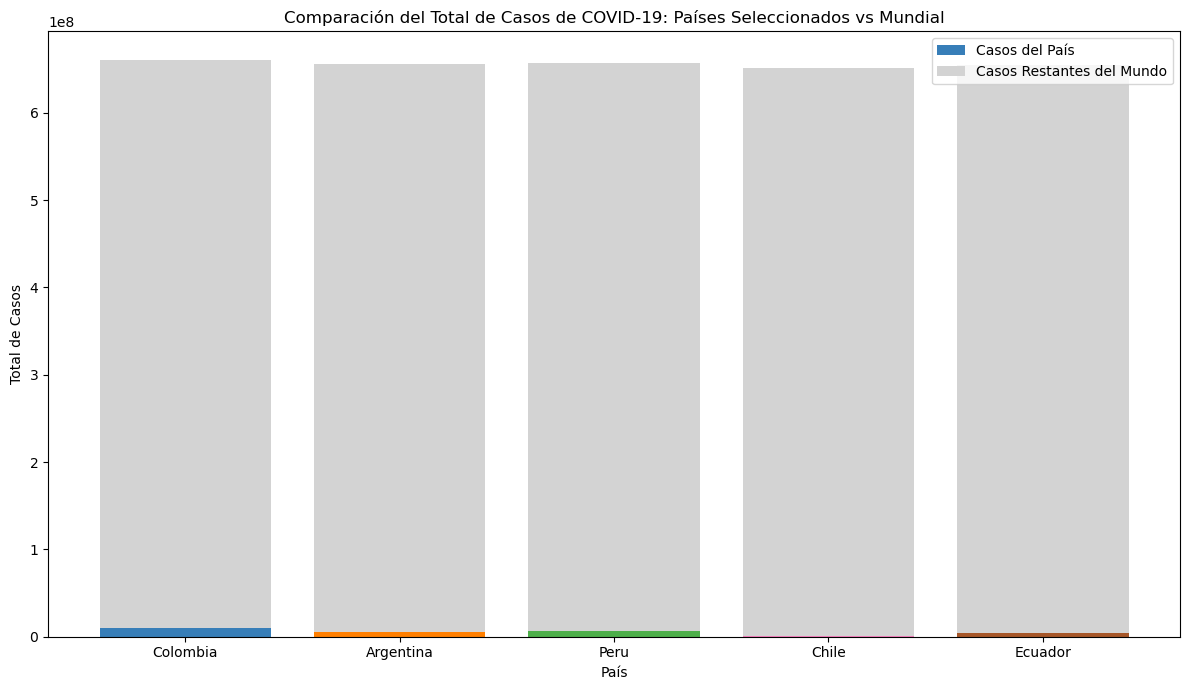

In [12]:
selected_countries_data = df[df['Country/Region'].isin(selected_countries)]
data = {
    'Country/Region': selected_countries,
    'Country Cases': total_cases_per_country['new_cases'],
    'World Cases': [total_world_cases - total_cases_per_country['new_cases'].sum()] * len(selected_countries)
}
comparison_df = pd.DataFrame(data)

# Colores para cada país, accesibles para personas con daltonismo
colors = ['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628']

# Crear la gráfica de barras apiladas
plt.figure(figsize=(12, 7))
bar1 = plt.bar(comparison_df['Country/Region'], comparison_df['Country Cases'], color=colors)
bar2 = plt.bar(comparison_df['Country/Region'], comparison_df['World Cases'], bottom=comparison_df['Country Cases'], color='#d3d3d3')  # Color neutro para casos restantes del mundo

plt.xlabel('País')
plt.ylabel('Total de Casos')
plt.title('Comparación del Total de Casos de COVID-19: Países Seleccionados vs Mundial')

# Añadir una leyenda
plt.legend((bar1[0], bar2[0]), ('Casos del País', 'Casos Restantes del Mundo'))

plt.tight_layout()
plt.show()

    Country/Region    new_cases
0  Remaining World  650195431.0


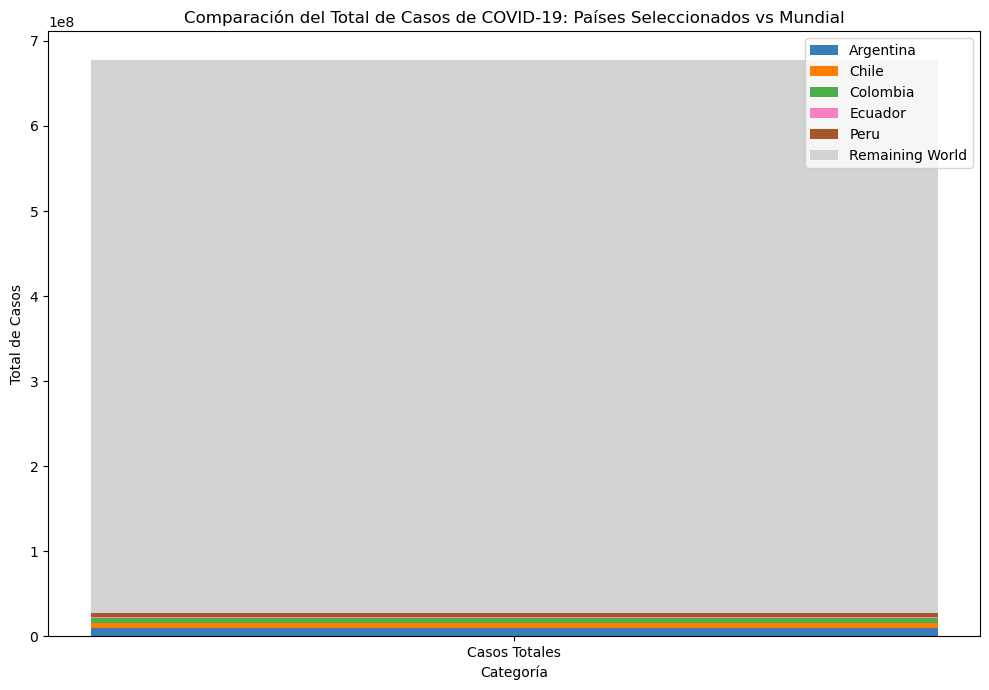

In [13]:
# Calcular los casos restantes en el mundo
remaining_world_cases = total_world_cases - total_cases_per_country['new_cases'].sum()

remaining_world_df = pd.DataFrame({'Country/Region': ['Remaining World'], 'new_cases': [remaining_world_cases]})

print(remaining_world_df)
# Crear un DataFrame para la gráfica apilada
stacked_data = total_cases_per_country.copy()
stacked_data = pd.concat([total_cases_per_country, remaining_world_df], ignore_index=True)


colors = ['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628', '#d3d3d3']

# Crear la gráfica de barras apiladas
plt.figure(figsize=(10, 7))

# Crear una barra apilada
bottom = 0
for i, row in stacked_data.iterrows():
    plt.bar('Casos Totales', row['new_cases'], bottom=bottom, color=colors[i], label=row['Country/Region'])
    bottom += row['new_cases']

plt.xlabel('Categoría')
plt.ylabel('Total de Casos')
plt.title('Comparación del Total de Casos de COVID-19: Países Seleccionados vs Mundial')

# Añadir una leyenda
plt.legend()

plt.tight_layout()
plt.show()

# Reflexión

Se partió del archivo generado en la unidad anterior, el cual ya contenía los datos limpios y preparados para su análisis. Posteriormente, se realizaron las respectivas gráficas, teniendo en cuenta que en casos como el de los casos acumulados para los cinco paises, se utiliza la rotaciòn de las etiquetas de los ejes para que los datos se puedan leer de manera adecuada. 

La herramienta matplolib de python  para la visualización de datos como los presentados, sirve de gran ayuda, pues en ocasiones las bases de datos que se pretenden analizar, presentan una cantidad datos enorme, y al graficar esta gran cantidad de datos usualmente se hacen dificiles de leer. Es allí donde se deben realizar agrupaciones y adicionalmente definir la mejor gráfica dependiendo de los datos para que las personas que visualizan o que toman las decisiones básandose en estas gráficas, puedan interpretarlas de manera intuitiva y sencilla.

Adicional a lo expuesto, matplolib permite editar fuentes, colores, tamaños y tipos de ejes, lo cual es muy utill al tratar de modficar y mejorar gráficas para los usuarios.